## **Lab Assignment 4**


<font color='gold'>Import Libraries </font>



In [16]:
!pip install ucimlrepo

In [17]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### <font color='gold'> Task - 1 [Marks 0] </font>:
Import the Bike Sharing Dataset (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

In [18]:
#importing bike sharing dataset from ucimlrepo
df = fetch_ucirepo(id=275)
X = df.data.features
y = df.data.targets



In [19]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [20]:
X = X.drop('dteday',axis=1)

In [21]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [22]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [23]:
X = pd.get_dummies(X, columns=['season', 'weekday', 'workingday', 'weathersit'])

In [24]:
X.head()

,yr,mnth,hr,holiday,temp,atemp,hum,windspeed,season_1,season_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,1,0,0,0.24,0.2879,0.81,0.0,True,False,...,False,False,False,True,True,False,True,False,False,False
1,0,1,1,0,0.22,0.2727,0.80,0.0,True,False,...,False,False,False,True,True,False,True,False,False,False
2,0,1,2,0,0.22,0.2727,0.80,0.0,True,False,...,False,False,False,True,True,False,True,False,False,False
3,0,1,3,0,0.24,0.2879,0.75,0.0,True,False,...,False,False,False,True,True,False,True,False,False,False
4,0,1,4,0,0.24,0.2879,0.75,0.0,True,False,...,False,False,False,True,True,False,True,False,False,False


In [25]:
#conert true to 1 and false to 0
x = X.columns
for i in x:
  X[i] = X[i].astype(float)

In [26]:
X.head()

,yr,mnth,hr,holiday,temp,atemp,hum,windspeed,season_1,season_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,1.0,0.0,0.0,0.24,0.2879,0.81,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.22,0.2727,0.80,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,2.0,0.0,0.22,0.2727,0.80,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,3.0,0.0,0.24,0.2879,0.75,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,4.0,0.0,0.24,0.2879,0.75,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

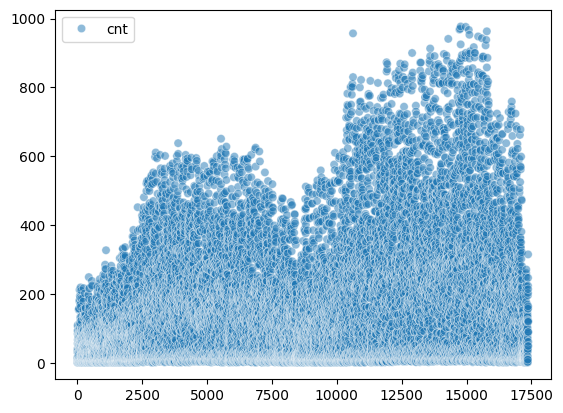

In [27]:
sns.scatterplot(y,alpha = 0.5)

### <font color='gold'> Task - 2 [Marks 1] </font>:
Split the dataset into training, validation and test sets (70%-15%-15%).


In [40]:
train_x,temp_x,train_y,temp_y = train_test_split(X.to_numpy(),y.to_numpy(),test_size=0.3,random_state=42)
val_x,test_x,val_y,test_y = train_test_split(temp_x,temp_y,test_size=0.5,random_state=42)


### <font color='gold'> Task - 3 [Marks 6] </font>:
Implement a decision tree regressor from scratch using reduction in MSE of the target (Count of total no of bikes) as the node splitting criterion.

In [41]:
class CART():
    def __init__(self, max_depth=10, min_samples_split=1000, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.gain = None
        self.left = None
        self.right = None
        self.depth = 0
        self.threshold = None
        self.feature_index = None # Changed to feature_index to work with NumPy arrays
        self.target = None
        self.n_samples = None
        self.output = None
#function to fit training data
    def fit(self, X, y):
        self.root = CART(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        self.root.grow_tree(X, y)
# function to make predictions
    def predict(self, features):
        return self.root._predict(features)
#function to find mse
    def _mse(self, y):
        if len(y)== 0:
            return 0
        return np.mean((y - np.mean(y))** 2)
  # function to find the best split
    def _best_split(self, X, y):
        best_gain = 0
        best_feature_index = None
        best_threshold = None
        current_mse = self._mse(y)

        n_features = X.shape[1]

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) < self.min_samples_leaf or len(right_y) < self.min_samples_leaf:
                    continue

                left_mse = self._mse(left_y)
                right_mse = self._mse(right_y)
                gain = current_mse - (len(left_y) / len(y)) * left_mse - (len(right_y) / len(y)) * right_mse

                if gain > best_gain:
                    best_gain = gain
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_gain, best_feature_index, best_threshold

    def grow_tree(self, X, y, depth=0):
        self.depth = depth
        self.n_samples = len(y)
        self.output = np.mean(y)
        self.target = y

        if depth >= self.max_depth or self.n_samples < self.min_samples_split or self.n_samples < 2 * self.min_samples_leaf:
            return

        gain, feature_index, threshold = self._best_split(X, y)

        if gain == 0:
            return

        self.gain = gain
        self.feature_index = feature_index
        self.threshold = threshold

        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        self.left = CART(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        self.right = CART(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)

        self.left.grow_tree(X[left_mask], y[left_mask], depth + 1)
        self.right.grow_tree(X[right_mask], y[right_mask], depth + 1)

    def _predict(self, features):
        if self.left is None:
            return self.output

        if features[self.feature_index] <= self.threshold:
            return self.left._predict(features)
        else:
            return self.right._predict(features)

### <font color='gold'> Task - 4 [Marks 3] </font>:

Tune the hyperparameters of the decision tree
- maximum depth of tree [10-18],
- minimum samples in node for split [7-12],
- minimum samples for leaf node [2-7]
on the validation set using grid search.

In [43]:
# Task 4: Tune hyperparameters using grid search

# Define the parameter grid
param_grid_scratch = {
    'max_depth': range(10, 19),
    'min_samples_split': range(7, 13),
    'min_samples_leaf': range(2, 8)
}


# Create a list to store the results
results_list = []

# Iterate over all combinations of hyperparameters
for max_depth in param_grid_scratch['max_depth']:
    for min_samples_split in param_grid_scratch['min_samples_split']:
        for min_samples_leaf in param_grid_scratch['min_samples_leaf']:
            # Initialize and train the model
            model_scratch = CART(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model_scratch.fit(train_x, train_y)

            # Make predictions on the validation set
            preds_val = []
            for i in range(len(val_x)):
              preds_val.append(model_scratch.predict(val_x[i]))
            preds_val = np.array(preds_val)

            # Calculate MSE on the validation set
            mse_val = mean_squared_error(val_y, preds_val)
            print(f"max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, MSE: {mse_val}")
            # Store the results
            results_list.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'mse_val': mse_val
            })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results_list)

# Find the best hyperparameters
best_params_scratch = results_df.loc[results_df['mse_val'].idxmin()]

print("Best Hyperparameters (from scratch):", best_params_scratch)

max_depth: 10, min_samples_split: 7, min_samples_leaf: 2, MSE: 3772.4355596323003
max_depth: 10, min_samples_split: 7, min_samples_leaf: 3, MSE: 3781.689948397729
max_depth: 10, min_samples_split: 7, min_samples_leaf: 4, MSE: 3678.834258461569
max_depth: 10, min_samples_split: 7, min_samples_leaf: 5, MSE: 3624.735790322896
max_depth: 10, min_samples_split: 7, min_samples_leaf: 6, MSE: 3572.7721665613853
max_depth: 10, min_samples_split: 7, min_samples_leaf: 7, MSE: 3652.261457466641
max_depth: 10, min_samples_split: 8, min_samples_leaf: 2, MSE: 3781.895379007052
max_depth: 10, min_samples_split: 8, min_samples_leaf: 3, MSE: 3773.9468114069655
max_depth: 10, min_samples_split: 8, min_samples_leaf: 4, MSE: 3678.834258461569
max_depth: 10, min_samples_split: 8, min_samples_leaf: 5, MSE: 3624.735790322896
max_depth: 10, min_samples_split: 8, min_samples_leaf: 6, MSE: 3572.7721665613853
max_depth: 10, min_samples_split: 8, min_samples_leaf: 7, MSE: 3652.261457466641
max_depth: 10, min_sampl

### <font color='gold'> Task - 5 [Marks 2] </font>:
Evaluate the performance of the decision tree regressor on the test set using the best values of the hyperparameters you obtained in step 4.

In [44]:
model_scratch = CART(max_depth=int(best_params_scratch['max_depth']), min_samples_split=int(best_params_scratch['min_samples_split']), min_samples_leaf=int(best_params_scratch['min_samples_leaf']))
model_scratch.fit(train_x, train_y)
preds = []
for i in range(len(test_x)):
  preds.append(model_scratch.predict(test_x[i]))
preds = np.array(preds)
mse = mean_squared_error(test_y, preds)
print("MSE:", mse)

MSE: 2822.3944802534525


### <font color='gold'> Task - 6 [Marks 1] </font>:
 Report the MSE obtained on the test set and show the scatter plot of predictions vs. Ground truths.

<Axes: >

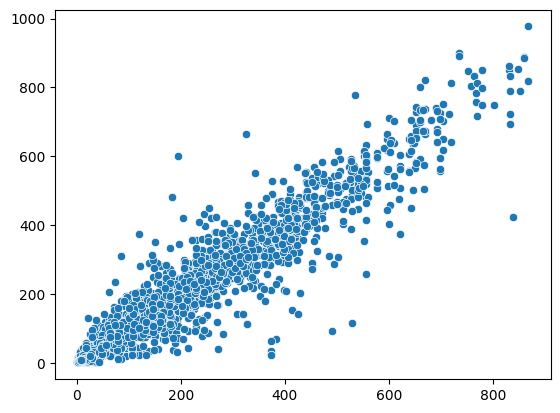

In [46]:
sns.scatterplot(x= preds, y= test_y.reshape(-1))

### <font color='gold'> Task - 7 [Marks 3] </font>:
 Fit a decision tree regressor model on the training set using scikit learn. Also, perform the cross validation and find the best values of the three hyperparameters in the same way as explained in case of the from scratch implementation.

In [56]:
model_sklearn = DecisionTreeRegressor()
param_grid = {
    'max_depth': [10,11,12,13,14,15,16,17,18],
    'min_samples_split': [7,8,9,10,11,12,13],
    'min_samples_leaf': [3,4,5,6,7]
}
grid_search = GridSearchCV(estimator=model_sklearn, param_grid=param_grid,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_x, train_y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_mse = -grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Best Hyperparameters: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 9}
Best MSE: 3230.6112176287834


### <font color='gold'> Task - 8 [Marks 1] </font>:
Evaluate the performance of the decision tree regressor from scikit-learn on the test set using the best values of the hyperparameters you obtained in Task 7.  

In [48]:
preds = best_model.predict(test_x)
mse = mean_squared_error(test_y, preds)
print("MSE:", mse)

MSE: 2892.0880400777396


### <font color='gold'> Task - 9 [Marks 1] </font>:
Report the MSE obtained on the test set and show the scatter plot of predictions obtained with scikit-learn's decision tree model vs. ground truths

<Axes: >

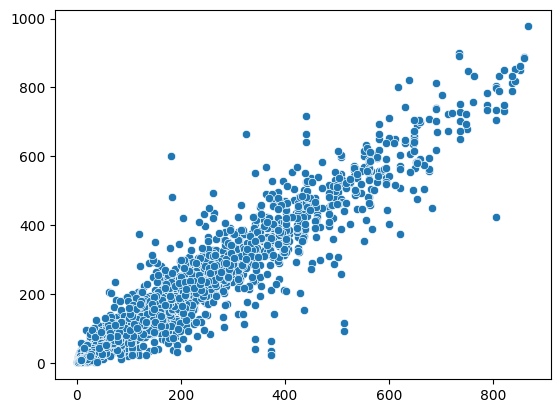

In [50]:
sns.scatterplot(x= preds, y= test_y.reshape(-1))

### <font color='gold'> Task - 10 [Marks 1] </font>:
Visualize the decision tree regressor learned by scikit-learn using scikit-learn's plot-tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

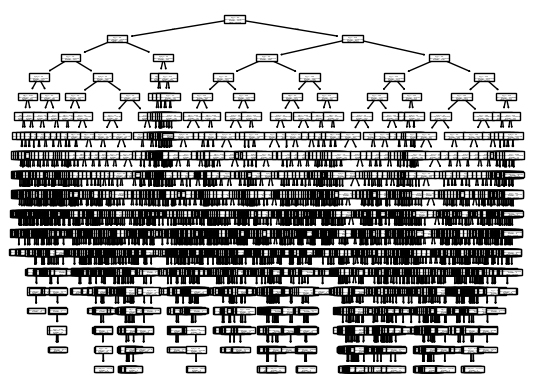

<Figure size 10000x8000 with 0 Axes>

In [51]:
# solution code
from sklearn.tree import plot_tree
tree = plot_tree(best_model)
plt.figure(figsize=(100, 80))
plt.show()

### <font color='gold'> Task - 11 [Marks 1] </font>:
Compare the best values of hyperparameters and prediction performance of the from scratch implementation and the scikit-learn implementation of decision tree regressor.

In [52]:
best_params['mse_val'] = mse

In [53]:
#lets compare best_values of hyperparameters and predictions
print("Best values of hyperparameters of scratch:" ,best_params_scratch.to_dict())
print("Best values of hyperparameters of sklearn:" ,best_params)

Best values of hyperparameters of scratch: {'max_depth': 16.0, 'min_samples_split': 10.0, 'min_samples_leaf': 4.0, 'mse_val': 2852.60507045005}
Best values of hyperparameters of sklearn: {'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 13, 'mse_val': 2892.0880400777396}
